## pip install Pillow

## 人脸数据库

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people()
#lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
faces.data.shape

(869, 2914)

In [4]:
# images是将我们的数据集以一个二维平面可视化的角度展现出来
# 62*47 = 2914
faces.images.shape

(869, 62, 47)

In [5]:
import numpy as np
# 随机获取36张脸
random_indexs = np.random.permutation(len(faces.data))
X = faces.data[random_indexs]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

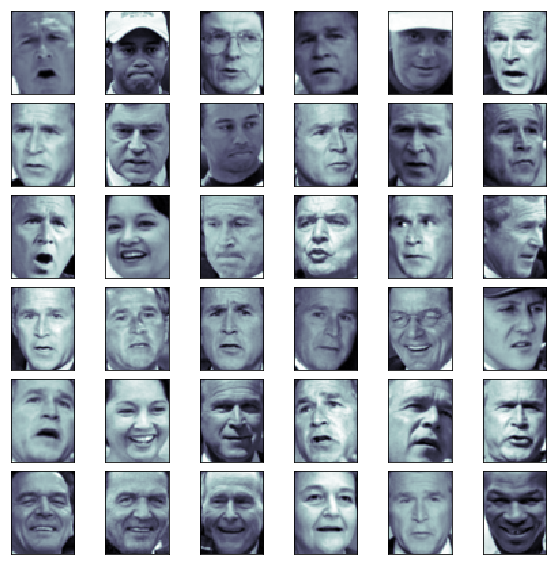

In [6]:
def plot_digits(data):
    fig,axes = plt.subplots(6,6,figsize=(10,10),
    subplot_kw={'xticks':[],'yticks':[]},
    gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,47),cmap='bone')

plot_digits(example_faces)

In [7]:
# 每张脸对应的人名
faces.target_names

array(['Alex Barros', 'Arminio Fraga', 'Audrey Sauret', 'Bison Dele',
       'Bob Beauprez', 'Bob Graham', 'Bob Huggins', 'Colin Montgomerie',
       'Curtis Strange', 'Daniela Cicarelli', 'Darren Clarke',
       'David Caruso', 'Dawn Staley', 'Edmund Stoiber',
       'Edward James Olmos', 'Eve Ensler', 'Felipe Perez Roque',
       'Fernando Leon de Aranoa', 'George HW Bush', 'George W Bush',
       'Gerhard Schroeder', 'Gideon Black', 'Gloria Macapagal Arroyo',
       'Gordon Brown', 'Guido Westerwelle', 'Heath Ledger',
       'Heather Whitestone McCallum', 'Herta Daeubler-Gmelin',
       'Igor Ivanov', 'JK Rowling', 'Jane Fonda', 'Jimmy Szymanski',
       'John Howard', 'John Manley', 'Juan Ignacio Chela',
       'Justin Guarini', 'Larry Ellison', 'Li Peng', 'Marc Grossman',
       'Michael Schumacher', 'Mike Tyson', 'Mstislav Rostropovich',
       'Nelson Mandela', 'Paul Lo Duca', 'Paul ONeill',
       'Pervez Musharraf', 'Richard Shelby', 'Robert Fico',
       'Robert Vowler', 'Sha

In [11]:
# 说明一共包含5749个不同的人的脸
len(faces.target_names)

54

In [18]:
%%time
X,y = faces.data,faces.target
from sklearn.decomposition import PCA
# 使用随机的方式来求解出PCA
# 没有指定n_componets ，也就是说想求出所有的主成分
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 10.8 s


In [19]:
# 一共2914个维度，所以求出了2914个主成分
pca.components_.shape

(869, 2914)

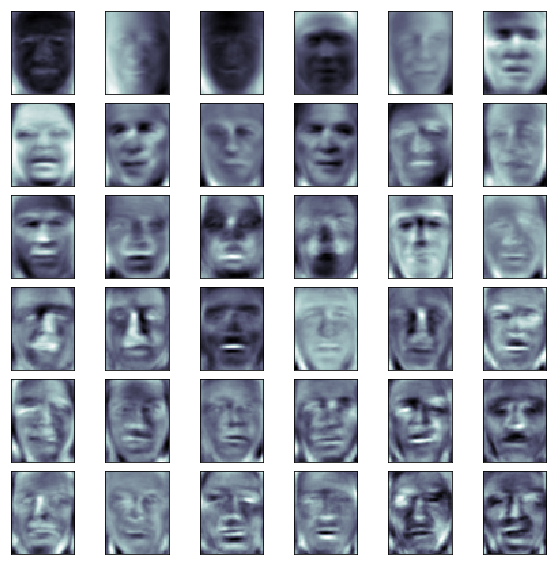

In [20]:
plot_digits(pca.components_)

#可以看到排在前面的这些脸相应的比较笼统，排名第一的这张脸，告诉我们人脸大概就是这个位置，大概有这样一个轮廓
#越往后，鼻子眼睛的信息就清晰了起来

#一方面我们可以方便直观的看出在人脸识别的过程中我们是怎么看到每一张脸相应的特征的
#另一方面，也可以看出来，其实每一张脸都是这些人脸的一个线性组合，而特征脸依据重要程度顺序的排在了这里

由于fetch_lfw_people这个库的人脸是分布不均匀的，有的人可能只有一张图片，有的人有几十张
 通过这个方法我们可以取出至少有60张脸的人的数据

In [12]:
faces2 = fetch_lfw_people(min_faces_per_person=60)
X,y = faces2.data,faces2.target